In [44]:
# vamos a entrenar una red para que sume 3 valores

In [1]:
import numpy as np
#Generamos training set con 1000 datos. 
# Input: vector de 3 números aleatorios X1, X2 y X3 (inputs) y los sumamos (Y, output) 
X1=np.random.uniform(size=1000)*100
X2=np.random.uniform(size=1000)*100
X3=np.random.uniform(size=1000)*100
X=np.transpose([X1,X2,X3])
# soluciones
Y=X1+X2+X3  
print np.shape(X),np.shape(Y)

(1000, 3) (1000,)


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y) 
# separa el set total entre train y test (3/4 y 1/4 por default) . Exactamente lo mismo que hacer:
#ntrain=3*len(y)/4
#X_train=X[:ntrain,:];y_train=y[:ntrain]
#X_test=X[ntrain:,:];y_test=y[ntrain:]
np.shape(y_train),np.shape(y_test)


((750,), (250,))

In [32]:
from sklearn.neural_network import MLPRegressor
# definimos numero de capas y de hidden nodes (3 capas, de 2 ,5  y 10 neuronas) 
# Exagerado para este problema ..
mlp = MLPRegressor(hidden_layer_sizes=(10,10,10),max_iter=500,verbose=True) # batch_size default depending on minimizer

In [33]:
mlp.fit(X_train,y_train) # usa modelo red neuronal que hemos definido antes y(x,w)
# mlp.loss_curve en Clasificación te guarda el valor de la función coste a cada iteración

Iteration 1, loss = 13116.85425455
Iteration 2, loss = 12781.25253028
Iteration 3, loss = 12428.90432642
Iteration 4, loss = 12044.45712259
Iteration 5, loss = 11652.34443350
Iteration 6, loss = 11254.03966685
Iteration 7, loss = 10847.36174263
Iteration 8, loss = 10450.12475153
Iteration 9, loss = 10072.10527810
Iteration 10, loss = 9705.26908473
Iteration 11, loss = 9341.62483850
Iteration 12, loss = 8968.40037166
Iteration 13, loss = 8566.68826984
Iteration 14, loss = 8148.23813639
Iteration 15, loss = 7703.14347288
Iteration 16, loss = 7225.57755423
Iteration 17, loss = 6694.58481560
Iteration 18, loss = 6096.30905146
Iteration 19, loss = 5456.33020224
Iteration 20, loss = 4779.01580025
Iteration 21, loss = 4085.04140666
Iteration 22, loss = 3384.95240466
Iteration 23, loss = 2731.21568768
Iteration 24, loss = 2101.58635059
Iteration 25, loss = 1555.42797735
Iteration 26, loss = 1073.69729198
Iteration 27, loss = 702.68903330
Iteration 28, loss = 420.40269998
Iteration 29, loss = 2

Iteration 258, loss = 1.04469225
Iteration 259, loss = 1.02933057
Iteration 260, loss = 1.01333456
Iteration 261, loss = 1.00221203
Iteration 262, loss = 0.98190671
Iteration 263, loss = 0.97042574
Iteration 264, loss = 0.95989976
Iteration 265, loss = 0.93983796
Iteration 266, loss = 0.92877028
Iteration 267, loss = 0.91821207
Iteration 268, loss = 0.90028760
Iteration 269, loss = 0.89138502
Iteration 270, loss = 0.88034115
Iteration 271, loss = 0.86462060
Iteration 272, loss = 0.85487165
Iteration 273, loss = 0.84582771
Iteration 274, loss = 0.83254164
Iteration 275, loss = 0.82175496
Iteration 276, loss = 0.81182493
Iteration 277, loss = 0.80159793
Iteration 278, loss = 0.78980413
Iteration 279, loss = 0.77993303
Iteration 280, loss = 0.77136489
Iteration 281, loss = 0.76195766
Iteration 282, loss = 0.75519756
Iteration 283, loss = 0.74165022
Iteration 284, loss = 0.72761614
Iteration 285, loss = 0.71976817
Iteration 286, loss = 0.71056044
Iteration 287, loss = 0.70151773
Iteration 

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [34]:
# en python2.7 no funciona para regresión, en python 3 si. Así podemos ver como avanza
#pl.plot(mlp.loss_curve_)  # mlp.loss_curve nos da una idea de como converge el training set
#pl.xlabel('iteration')
#pl.ylabel('loss function'

coeficiente correlación 0.9999296989957829
error relativo 0.3254770692986282


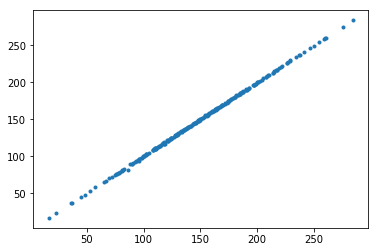

In [53]:
predictions = mlp.predict(X_test) # estimamos resultado con el TEST
print 'coeficiente correlación', np.corrcoef(predictions,y_test)[0][1]  # calculamos correlación con el valor esperado
print 'error relativo', np.mean(abs(predictions-y_test)/y_test)*100  # calculamos correlación con el valor esperado


import matplotlib.pyplot as pl
pl.plot(predictions,y_test,'.')


In [54]:
# Le pregunto a la red que me sume 10+30+5 

In [55]:
A=np.array([1,2,6]).reshape(1,-1) # sklearn necesita que se lo de dimension(1,n)
print 'la suma predicha es', round(mlp.predict(A)) # redondamos
print 'la suma real es',round(np.sum(A))

la suma predicha es 9.0
la suma real es 9.0


In [56]:
# si miramos valores muy lejos del rango
A=np.array([1050,1250,1250]).reshape(1,-1) 
np.shape(A)
print 'la suma predicha es', round(mlp.predict(A)) # redondamos
print 'la suma real es',round(np.sum(A))

la suma predicha es 3541.0
la suma real es 3550.0


In [9]:
print 'NO ha aprendido a sumar. Ha ajustado muy bien los datos y un entorno relativamente ancho'



NO ha aprendido a sumar. Ha ajustado muy bien los datos y un entorno relativamente ancho
